## Import files

In [1]:
import pandas as pd

df_train = pd.read_csv('./input/train.csv')
df_train.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class
0,train_00001.jpg,1,80,641,461,108
1,train_00002.jpg,57,53,293,236,71
2,train_00003.jpg,35,42,227,160,76
3,train_00004.jpg,10,21,254,165,188
4,train_00005.jpg,1,67,772,573,44


In [2]:
df_test = pd.read_csv('./input/test.csv')
df_test.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2
0,test_00001.jpg,199,184,1116,809
1,test_00002.jpg,55,61,480,257
2,test_00003.jpg,42,123,602,413
3,test_00004.jpg,13,8,619,393
4,test_00005.jpg,8,9,209,93


In [4]:
df_class = pd.read_csv('./input/class.csv')
df_class.head()

,id,name
0,1,AM General Hummer SUV 2000
1,2,Acura RL Sedan 2012
2,3,Acura TL Sedan 2012
3,4,Acura TL Type-S 2008
4,5,Acura TSX Sedan 2012


## check number of images in train and test folders

In [7]:
import os

print(len(list(os.listdir('./input/train'))))
print(len(list(os.listdir('./input/test'))))

10016
6169


In [8]:
df_class.shape
# (196, 2) == 196 classes, 2 columns (id, classname)

(196, 2)

## Visualize the data

In [27]:
# python image library
from PIL import Image, ImageDraw

filenames = df_train.img_file[:4]
filenames.head(1) # let's see about 10 images

0    train_00001.jpg
Name: img_file, dtype: object

In [28]:
# import plotting library
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

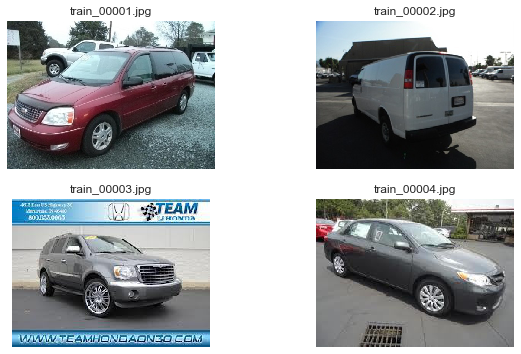

In [31]:
plt.figure(figsize=(10,6))

for index, filename in enumerate(filenames):
    img = Image.open('./input/train/' + filename)
    plt.subplot(2,2, index+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(filename)

## Crop the images with the provided bounding box

In [62]:
# referenced from https://www.kaggle.com/tmheo74/3rd-ml-month-car-image-cropping/output

TRAIN_IMG_PATH = './input/train/'
TEST_IMG_PATH = './input/test/'

def crop_boxing_img(img_name, margin=16) :
    if img_name.split('_')[0] == "train" :
        PATH = TRAIN_IMG_PATH
        data = df_train
    elif img_name.split('_')[0] == "test" :
        PATH = TEST_IMG_PATH
        data = df_test
        
    img = Image.open(PATH + img_name)
    pos = data.loc[data["img_file"] == img_name, \
                   ['bbox_x1','bbox_y1', 'bbox_x2', 'bbox_y2']].values.reshape(-1)

    width, height = img.size
    x1 = max(0, pos[0] - margin)
    y1 = max(0, pos[1] - margin)
    x2 = min(pos[2] + margin, width)
    y2 = min(pos[3] + margin, height)

    return img.crop((x1,y1,x2,y2))

In [63]:
CROPPED_TRAIN_IMAGE_FOLDER_PATH = './cropped_train_images/'

for i, row in df_train.iterrows():
    if i % 100 == 0: print(i)
    cropped = crop_boxing_img(row['img_file'])
    cropped.save(CROPPED_TRAIN_IMAGE_FOLDER_PATH + row['img_file'])

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000


In [64]:
CROPPED_TEST_IMAGE_FOLDER_PATH = './cropped_test_images/'

for i, row in df_test.iterrows():
    if i % 100 == 0: print(i)
    cropped = crop_boxing_img(row['img_file'])
    cropped.save(CROPPED_TEST_IMAGE_FOLDER_PATH + row['img_file'])

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100


## Check and see it to verify

ValueError: num must be 1 <= num <= 10, not 11

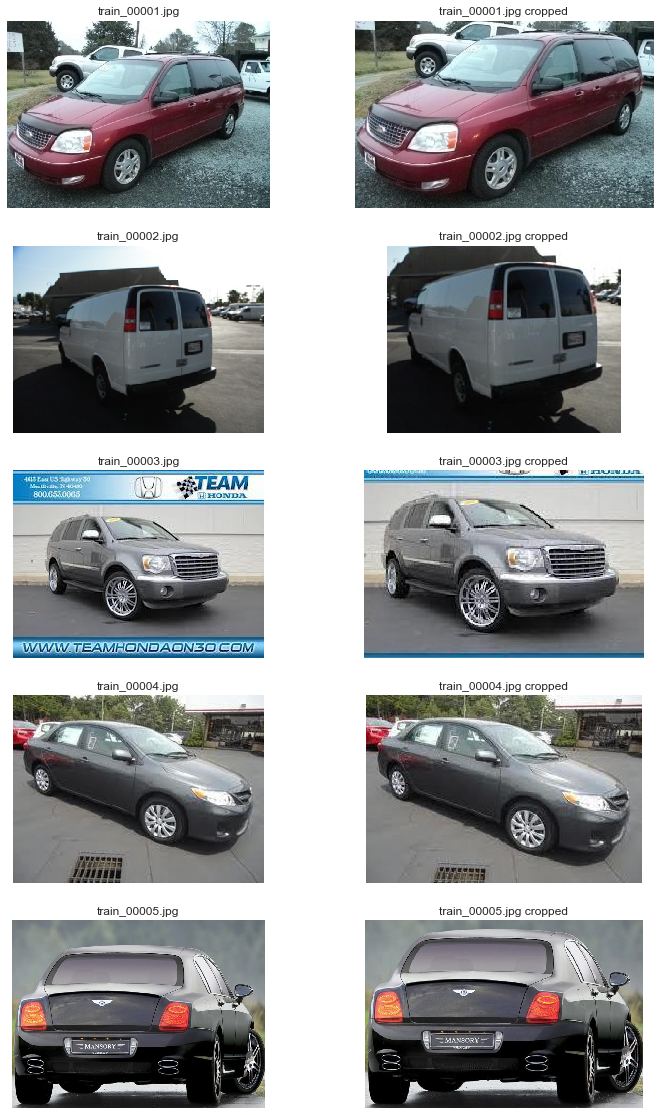

In [53]:
tmp_imgs = df_train['img_file'][:10]
plt.figure(figsize=(12,20))

for num, f_name in enumerate(tmp_imgs):
    img = Image.open(os.path.join(TRAIN_IMG_PATH, f_name))
    plt.subplot(5, 2, 2*num + 1)
    plt.title(f_name)
    plt.imshow(img)
    plt.axis('off')
    
    img_crop = Image.open(os.path.join('./cropped_train_images/', f_name))
    plt.subplot(5, 2, 2*num + 2)
    plt.title(f_name + ' cropped')
    plt.imshow(img_crop)
    plt.axis('off')


## zip the cropped images into a .zip file

In [66]:
import zipfile
import glob

with zipfile.ZipFile('train_crop.zip','w') as zip: 
        # writing each file one by one
        for file in glob.glob('cropped_train_images/train*.jpg'): 
            zip.write(file)

In [67]:
with zipfile.ZipFile('test_crop.zip','w') as zip: 
        # writing each file one by one 
        for file in glob.glob('cropped_test_images/test*.jpg'): 
            zip.write(file)